In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Our simulation takes FOREVER to run. Hopefully this will help us figure out the best parameters to run with.  

project.py now has 4 new detector geometries, each with 50m dom spacing, centered on [0,0,0], with 2, 3, 4, or 5 doms along each side of the IceCube (see code below)

I test how varying amounts of shower steps affect run times for each of these geometries. For larger geometries, I test for fewer shower steps because the run time adds up quickly. 

In [2]:
# Runtimes for Random Neutrino locations and directions

In [3]:
runtimes = {
    'IceCube_2': {
        '1 Shower Steps': [  1+( 7/60),  1+( 6/60),    (52/60),    (43/60),    (59/60), 
                               (57/60),  1+(21/60),    (49/60),    (56/60),  1+( 3/60) ],
        '2 Shower Steps': [  4+(27/60),  4+(27/60),  4+(31/60),  3.       ,  3+(14/60),
                             3+(33/60),  3+(39/60),  3+(41/60),  3+(20/60),  4+(24/60) ],
        '3 Shower Steps': [  7+( 5/60),  5+(28/60),  6+(51/60),  7+(24/60),  5+(22/60),
                             8+(18/60), 10+(25/60),  9+(25/60), 10+(31/60),  7+(58/60) ],
        '4 Shower Steps': [ 22+(30/60), 17+(44/60), 16+(18/60), 17+( 9/60), 15+(20/60),
                            24+(41/60), 18+(21/60), 21+(51/60), 23+(12/60), 17+(56/60) ],
        '5 Shower Steps': [ 34+(29/60), 40+(42/60), 34+(47/60), 35+( 1/60), 31+(29/60), 
                            35+(28/60), 40+(56/60), 33+(15/60), 31+(31/60), 40+(59/60)],
    },
    'IceCube_3': {
        '1 Shower Steps': [  3+( 3/60),  2+( 3/60),  3+(10/60),  2+(54/60),  2+( 9/60),
                             1+(48/60),  1+(54/60),  1+(53/60),  1+(53/60),  1+(42/60) ],
        '2 Shower Steps': [  7+(25/60),  7+(46/60),  7+(10/60),  6+(51/60),  7+(34/60),
                             7+(40/60),  7+(27/60),  7+(11/60),  8.       ,  7+(35/60) ],
        '3 Shower Steps': [ 19+( 6/60), 20+(19/60), 18+(57/60), 18+(52/60), 19+(16/60),
                            20+(35/60), 19+(34/60), 14+(54/60), 19+(20/60), 18+(17/60) ],
        '4 Shower Steps': [ 45+(19/60), 43+(52/60), 45.       , 34+(37/60), 33+(46/60),
                            38+( 1/60), 37+(25/60), 36+(55/60), 43+(16/60), 45+(19/60) ],
        '5 Shower Steps': [ 96+( 1/60),103+(48/60), 79+(12/60),104+(48/60),109+(53/60),
                           105+(54/60),107+(27/60),101+(32/60),103+(52/60), 69+(45/60) ],
    },
    'IceCube_4': {
        '1 Shower Steps': [  4+(59/60),  4+(47/60),  6+( 8/60),  5+(58/60),  7+(41/60),
                             4+(55/60),  4+(48/60),  7+(20/60),  5+(19/60),  7+( 1/60) ],
        '2 Shower Steps': [ 28.       , 20+(56/60), 27+( 6/60), 28+(27/60), 27+(17/60),
                            22+( 5/60), 15+(37/60), 20+( 3/60), 19+(39/60), 22+( 2/60) ],
        '3 Shower Steps': [ 41+(44/60), 51+(16/60), 51+( 1/60), 51+(18/60), 50+( 7/60),
                            60+(18/60), 42+(19/60), 52+(12/60), 46+(18/60), 51+(19/60) ],
        '4 Shower Steps': [ 96+( 1/60),103+(48/60), 79+(12/60),104+(48/60),109+(53/60),
                           105+(54/60),107+(27/60),101+(32/60),103+(52/60), 69+(45/60)],
    },
    'IceCube_5': {
        '1 Shower Steps': [  9+(51/60), 10+(22/60), 13+(10/60),  8+(31/60), 10+( 3/60),
                             9+( 8/60),  9+(34/60), 10+(10/60),  9+( 9/60),  8+(30/60) ],
        '2 Shower Steps': [ 38+(18/60), 32+(32/60), 35+(11/60), 35+(44/60), 37+(34/60),
                            30+( 5/60), 37+( 4/60), 29+(21/60), 35+(51/60), 34+(54/60) ],
        '3 Shower Steps': [ 69+(47/60),111+(44/60),103.       , 96.       , 92.       ,
                            73+(33/60), 88+(54/60), 80+(39/60), 79+( 4/60), 87+( 2/60) ],
    },
    
}

In [4]:
runtimes_mean = {}
runtimes_std  = {}

for detector, runtime in runtimes.items():
    runtimes_mean[detector] = {}
    runtimes_std[detector]  = {}
    for shower_steps, data in runtime.items():
        runtimes_mean[detector][shower_steps] = np.mean(data)
        runtimes_std[detector][shower_steps] = np.std(data)

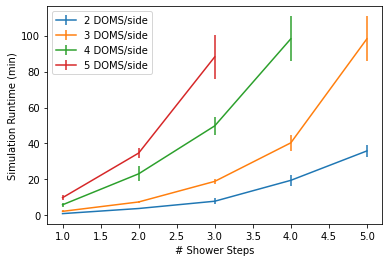

In [5]:
# Plots by shower steps
fig, ax = plt.subplots()
for detector, runtime in runtimes_mean.items():
    xs = [int(key[0]) for key in runtime.keys()]
    ys = list(runtime.values())
    yerrs = list(runtimes_std[detector].values())
    ax.errorbar(xs, ys, yerrs, label = detector[-1] + " DOMS/side")
ax.set_xlabel("# Shower Steps")
ax.set_ylabel("Simulation Runtime (min)")
plt.legend()
plt.show()

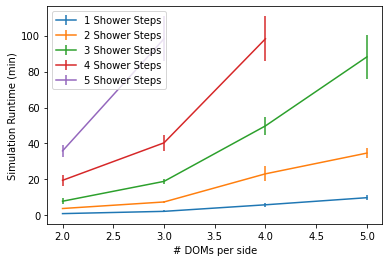

In [6]:
# Plots by # Doms / side
fig, ax = plt.subplots()
for shower_step in runtimes['IceCube_2'].keys():
    xs = []
    if shower_step[0] == '5':
        xs = [2,3]
    elif shower_step[0] == '4':
        xs = [2,3,4]
    else:
        xs = [2,3,4,5]
    ys =   [runtimes_mean[f"IceCube_{x}"][shower_step] for x in xs]
    yerrs = [runtimes_std[f"IceCube_{x}"][shower_step] for x in xs]

    ax.errorbar(xs, ys, yerrs, label = shower_step)
ax.set_xlabel("# DOMs per side")
ax.set_ylabel("Simulation Runtime (min)")
plt.legend()
plt.show()

In [7]:
pd.DataFrame(runtimes_mean)

,IceCube_2,IceCube_3,IceCube_4,IceCube_5
1 Shower Steps,0.988333,2.248333,5.893333,9.846667
2 Shower Steps,3.826667,7.465000,23.120000,34.656667
3 Shower Steps,7.878333,18.916667,49.786667,88.171667
4 Shower Steps,19.503333,40.350000,98.220000,NaN
5 Shower Steps,35.861667,98.220000,NaN,NaN


# Runtimes for a fixed Neutrino Event

In [18]:
# Neutrino travelling in [0,1,0]
runtimes = {
    'IceCube_2': {
        # Neutrino at 0, -10, 10
        '1 Shower Steps': [    (42/60),    (48/60),    (41/60),    (41/60),    (41/60),
                               (49/60),    (39/60),    (43/60),    (42/60),    (44/60) ],
        '2 Shower Steps': [  2+(36/60),  3+(34/60),  2+(48/60),  3+( 3/60),  3+(48/60),
                             3+(12/60),  4+(35/60),  3+( 4/60),  3+(42/60),  3+( 4/60) ],
        '3 Shower Steps': [  7+(38/60),  9+(51/60),  6.       ,  5+(59/60),  5+(58/60),
                             7+(41/60),  7+(35/60),  6+(21/60),  7+(38/60),  7+(54/60) ],
        '4 Shower Steps': [ 17+(24/60), 16+(31/60), 16+(39/60), 16+(37/60), 17+(48/60),
                            15+(18/60), 16+( 1/60), 19+(30/60), 15+(51/60), 16+( 1/60) ],
        '5 Shower Steps': [ 31+(53/60), 25+(20/60), 25+(55/60), 28+(44/60), 29+(30/60),
                            37+(48/60), 40+(14/60), 29+(12/60), 40+(20/60), 29+(23/60) ],
    },
    'IceCube_3': {
        # Neutrino at 0, -35, 10
        '1 Shower Steps': [  2+(44/60),  2+(34/60),  2+(55/60),  2+(56/60),  2+(49/60),
                             2+(31/60),  2+(30/60),  2+(51/60),  3+( 2/60),  2+(16/60)],
        '2 Shower Steps': [  8+(22/60),  9+(20/60),  9+( 4/60), 11+(31/60), 11+(24/60),
                            11+(18/60),  8+(23/60),  9+( 5/60), 11+(50/60), 12+( 4/60) ],
        '3 Shower Steps': [ 19+(18/60), 26+( 4/60), 19+(17/60), 27+(15/60), 26+(53/50),
                            25+(13/60), 26+(14/60), 25+(16/60), 21+(46/60), 21+( 5/60) ],
        '4 Shower Steps': [ 37+(18/60), 47+(17/60), 34+(39/60), 38.       , 47+(50/60),
                            48+(17/60), 57+(27/60), 37+(43/60), 45+( 1/60), 38+(27/60) ],
        '5 Shower Steps': [ 85+(31/60), 85+(12/60), 82+(22/60),110+(13/60),105+(48/60),
                           120+(39/60),112.       , 82+(36/90), 78+(23/60), 80+(13/60) ],
        # Neutrino at 0, -10, 10
#         '1 Shower Steps': [  2.       ,  1+(57/60),  2+( 5/60),  2+( 5/60),  2+(31/60),
#                              2+(42/60),  1+(54/60),  1+(56/60),  1+(55/60),  1+(48/60) ],
#         '2 Shower Steps': [  7+(13/60), 10+(48/60), 11+(45/60), 10+(44/60), 10+(26/60),
#                             10+(30/60),  7+(36/60),  7+(47/60),  8+(21/60),  8+(21/60) ],
#         '3 Shower Steps': [ 16+(49/60), 19+(30/60), 19+(27/60), 19+(28/60), 19+(24/60),
#                             17+(33/60), 21+(23/60), 17+(29/60), 22+(32/60), 16+(49/60) ],
#         '4 Shower Steps': [ 46+(27/60), 33+(41/60), 33+(52/60), 38+(27/60), 54+(18/60),
#                             56+(48/60), 54+(48/60), 55+(11/60), 31+(38/60), 40+(19/60) ],
#         '5 Shower Steps': [ 93+( 8/60),111+(24/60),142+( 6/60),117+(12/60),117+(32/60),
#                             88+(33/60), 79+(21/60), 83+( 2/60), 79+(49/60),107+(20/60) ],
    },
    'IceCube_4': {
        # Neutrino at 0, -10, 10
        '1 Shower Steps': [  5+(22/60),  5+(30/60),  6+(53/60),  7+(15/60),  7+( 8/60),
                             5+(41/60),  5+(27/60),  4+(13/60),  5+(28/60),  4+(17/60) ],
        '2 Shower Steps': [ 28+(45/60), 16+(42/60), 16+(11/60), 19.       , 18+(57/60),
                            18+( 3/60), 24+(46/60), 16+(28/60), 17+( 5/60), 14+(18/60) ],
        '3 Shower Steps': [ 56+(39/60), 39+(30/60), 42+(46/60), 33+(53/60), 39+(33/60),
                            39+(20/60), 56+( 9/60), 56+(16/60), 44+(54/60), 51+(19/50) ],
        '4 Shower Steps': [110+(43/60),113+(24/60),111+(10/60),107+( 7/60),106+( 4/60),
                            96+(39/60),114+(58/60), 82+( 9/60),106+(58/60), 99+(21/60) ],
    },
    'IceCube_5': {
        # Neutrino at 0, -35, 10
        '1 Shower Steps': [ 13+(50/60),  9+(50/60), 10+(34/60), 10+(16/60), 11+( 2/60),
                            11+(46/60), 12+(16/60), 13+( 3/60), 10+(14/60) ],
        '2 Shower Steps': [ 34+(50/60), 46+(36/60), 41+(34/60), 55+(36/60), 37+(13/60),
                            47+( 7/60), 39+(58/60), 36+(51/60), 68+(20/60), 37+(19/60) ],
        '3 Shower Steps': [ 72+(37/60), 73+(46/60), 59+( 3/60), 77+(46/60), 85+(58/60),
                           106+(22/60), 97+(56/60), 85+(56/60), 75+(55/60), 67+(17/60) ],
        # Neutrino at 0, -10, 10
#         '1 Shower Steps': [  8+(33/60),  8+(22/60), 10+(25/60),  7+(50/60),  7+(46/60),
#                             10+(12/60), 10+( 3/60),  8+(10/60),  8+(12/60),  8+(14/60)],
#         '2 Shower Steps': [ 39+(15/60), 45+(53/60), 29+( 2/60), 28+(55/60), 38+(36/60),
#                             39+(55/60), 45+(15/60), 51+ (4/60), 42+(57/60), 33+(39/60) ],
#         '3 Shower Steps': [ 97+(30/60), 96+(49/60), 94+(34/60), 71+(37/60), 65+(52/60),
#                             92+(29/60), 70+(35/60), 69+(11/60),132+(43/60),110+(39/60) ],
    },
    
}

In [19]:
runtimes_mean = {}
runtimes_std  = {}

for detector, runtime in runtimes.items():
    runtimes_mean[detector] = {}
    runtimes_std[detector]  = {}
    for shower_steps, data in runtime.items():
        runtimes_mean[detector][shower_steps] = np.mean(data)
        runtimes_std[detector][shower_steps] = np.std(data)

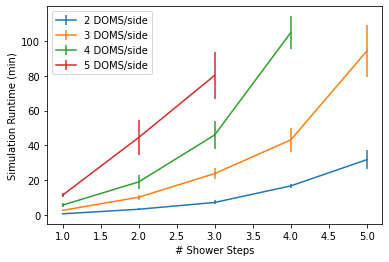

In [20]:
# Plots by shower steps
fig, ax = plt.subplots()
for detector, runtime in runtimes_mean.items():
    xs = [int(key[0]) for key in runtime.keys()]
    ys = list(runtime.values())
    yerrs = list(runtimes_std[detector].values())
    ax.errorbar(xs, ys, yerrs, label = detector[-1] + " DOMS/side")
ax.set_xlabel("# Shower Steps")
ax.set_ylabel("Simulation Runtime (min)")
plt.legend()
plt.show()

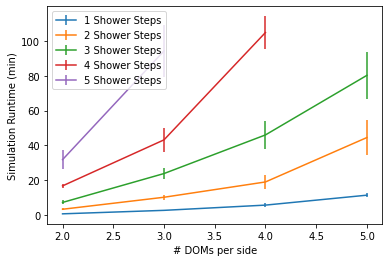

In [21]:
# Plots by # Doms / side
fig, ax = plt.subplots()
for shower_step in runtimes['IceCube_2'].keys():
    xs = []
    if shower_step[0] == '5':
        xs = [2,3]
    elif shower_step[0] == '4':
        xs = [2,3,4]
    else:
        xs = [2,3,4,5]
    ys =   [runtimes_mean[f"IceCube_{x}"][shower_step] for x in xs]
    yerrs = [runtimes_std[f"IceCube_{x}"][shower_step] for x in xs]

    ax.errorbar(xs, ys, yerrs, label = shower_step)
ax.set_xlabel("# DOMs per side")
ax.set_ylabel("Simulation Runtime (min)")
plt.legend()
plt.show()

In [22]:
pd.DataFrame(runtimes_mean)

,IceCube_2,IceCube_3,IceCube_4,IceCube_5
1 Shower Steps,0.716667,2.713333,5.723333,11.427778
2 Shower Steps,3.343333,10.235000,19.025000,44.540000
3 Shower Steps,7.258333,23.852667,46.038000,80.260000
4 Shower Steps,16.766667,43.198333,104.855000,NaN
5 Shower Steps,31.831667,94.275000,NaN,NaN


# Runtime by Energy

In [13]:
# for IceCube 4 and 3 shower steps
runtimes = {
    '1e6':  [ 40+(34/60), 62+(46/60), 63+(18/60), 62+(13/60), 57+(53/60),
              54+(45/60), 57+(28/60), 36+( 3/60), 33+(47/60), 57+(58/60) ],
    '1e8':  [ 54+( 7/60), 37+( 9/60), 33+(14/60), 49+(17/60), 50+( 8/60),
              45+(57/60), 49+(43/60), 56+(17/60), 48+(39/60), 48+(32/60) ],
    '4e10': [ 56+(39/60), 39+(30/60), 42+(46/60), 33+(53/60), 39+(33/60),
              39+(20/60), 56+( 9/60), 56+(16/60), 44+(54/60), 51+(19/50) ],
    '1e12': [ 56+( 1/60), 49+(30/60), 47+(29/60), 45+(33/60), 32+(43/60),
              45+(27/60), 48+(52/60), 43+(58/60), 51+(24/60), 50+(25/60) ],
    '1e14': [ 52+(54/60), 51+(10/60), 52+(11/60), 56+(47/60), 52+(56/60),
              43+(32/60), 55+(57/60), 36+(38/60), 55+(35/60), 50+(16/60) ],
}

In [14]:
runtimes_mean = {}
runtimes_std  = {}

for energy, runtime in runtimes.items():
    runtimes_mean[energy] = np.mean(runtime)
    runtimes_std[energy]  = np.std(runtime)

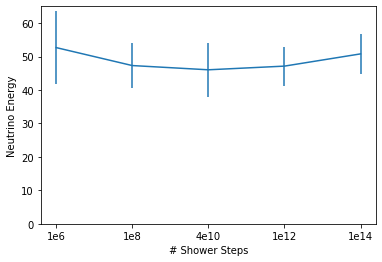

In [15]:
# Plots by shower steps
fig, ax = plt.subplots()
xs = list(runtimes_mean.keys())
ys = list(runtimes_mean.values())
yerrs = list(runtimes_std.values())
ax.errorbar(xs, ys, yerrs)
ax.set_xlabel("# Shower Steps")
ax.set_ylabel("Neutrino Energy")
ax.set_ylim(0,65)
plt.show()

In [16]:
runtimes_mean

{'1e6': 52.675,
 '1e8': 47.30499999999999,
 '4e10': 46.038,
 '1e12': 47.13666666666667,
 '1e14': 50.79333333333334}